In [36]:
import tensorflow as tf
import os

In [8]:
a = tf.constant(5.0)
b = tf.constant(6.0)

sum1 = tf.add(a, b)

In [9]:
sum1

<tf.Tensor 'Add:0' shape=() dtype=float32>

In [14]:
with tf.Session() as sess:
    print(sess.run(sum1))

11.0


In [17]:
tf.get_default_graph() # 分配内存

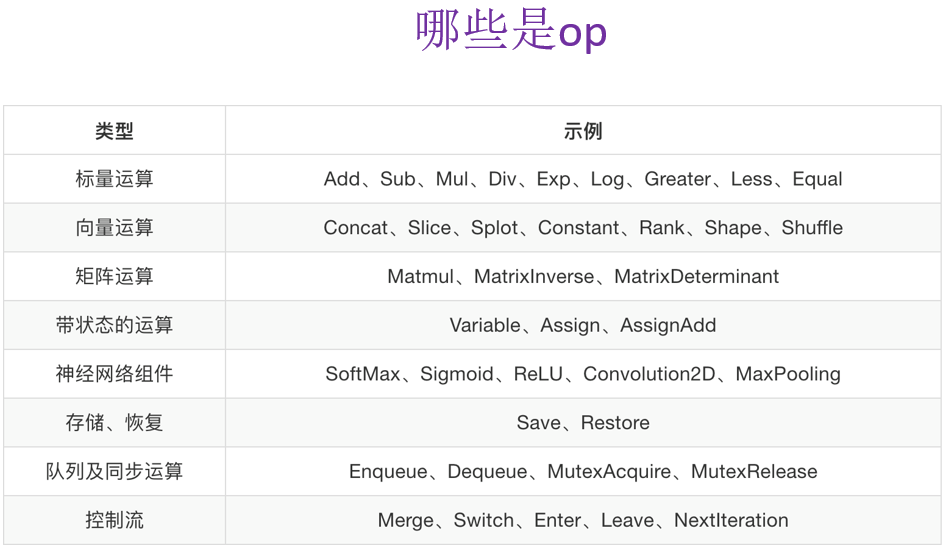

---
---
---

# Graph

In [19]:
g = tf.Graph()
print(g)
with g.as_default():
    c = tf.constant(11.0)
    print(c.graph)

---
---
---

# Session

In [27]:
plt = tf.placeholder(tf.float32, [3, 3]) # [None, 3]

print(plt)

with tf.Session(config=tf.ConfigProto(log_device_placement=True)) as sess:
    print(sess.run(plt, feed_dict={plt: [[1, 2, 3], [4, 5, 36], [2, 3, 4]]}))
    print(sum1.eval())
    print(a.graph)
    print("---------")
    print(a.shape)
#     print(plt.shape)
    print("-------")
    print(a.name)
    print("-------")
    print(a.op)

Tensor("Placeholder_2:0", shape=(3, 3), dtype=float32)
[[ 1.  2.  3.]
 [ 4.  5. 36.]
 [ 2.  3.  4.]]
11.0
---------
()
-------
Const_5:0
-------
name: "Const_5"
op: "Const"
attr {
  key: "dtype"
  value {
    type: DT_FLOAT
  }
}
attr {
  key: "value"
  value {
    tensor {
      dtype: DT_FLOAT
      tensor_shape {
      }
      float_val: 5.0
    }
  }
}



`tensorflow`:打印出来的形状表示   
> 0维:()   
> 1维:(5)   
> 2维:(5,6)    
> 3维:(2,3,4)

In [23]:
tf.InteractiveSession()

In [24]:
a.eval()

5.0

---
---
---

# 张量
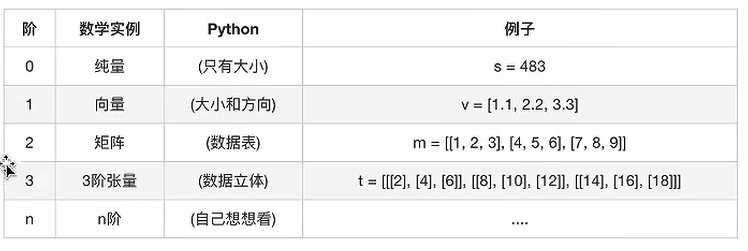

## 形状的概念
> 静态形状和动态性状   
> 对于静态形状来说,一旦张量形状固定了，不能再次设置静态形状,不能夸维度修改 1D->1D 2D->2D   
> 动态形状可以去创建一个新的张量,改变时候一定要注意元素数量要匹配  1D->2D  1D->3D

In [31]:
plt = tf.placeholder(tf.float32, [None, 2])

print(plt)

plt.set_shape([3, 2])

print(plt)

# plt.set_shape([2, 3]) # 不能再次修改

plt_reshape = tf.reshape(plt, [2, 3, 1])

print(plt_reshape)

with tf.Session() as sess:
    pass 

Tensor("Placeholder_6:0", shape=(?, 2), dtype=float32)
Tensor("Placeholder_6:0", shape=(3, 2), dtype=float32)
Tensor("Reshape_2:0", shape=(2, 3, 1), dtype=float32)


In [33]:
tf.ones([3,5]).eval()

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]], dtype=float32)

In [34]:
tf.zeros([3,5]).eval()

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]], dtype=float32)

In [35]:
tf.ones_like([3,5]).eval()

array([1, 1])

In [37]:
tf.random_normal([3,5]).eval()

array([[-0.17748062, -2.6119587 ,  0.36933446,  0.6822048 ,  0.2617937 ],
       [ 1.2827653 , -1.227052  , -0.07390294, -1.4616143 ,  1.9783362 ],
       [-0.8796912 ,  0.2603563 ,  0.27650243, -0.5181431 , -0.84419906]],
      dtype=float32)

In [39]:
tf.cast([1,2,3], tf.float32).eval() # int --> float

array([1., 2., 3.], dtype=float32)

In [44]:
a = [[1,2,3],[4,5,6]]
b = [[3,2,1],[6,5,4]]
tf.concat([a,b], axis=0).eval()

array([[1, 2, 3],
       [4, 5, 6],
       [3, 2, 1],
       [6, 5, 4]])

---
---
---

# 变量
1、变量op能够持久化保存，普通张量op是不行的   
2、当定义一个变量op的时候，一定要在会话当中去运行初始化   
3、name参数：在tensorboard使用的时候显示名字，可以让相同op名字的进行区分


In [45]:
a = tf.constant(5.0, name='a')
b = tf.constant(5.0, name='b')
c = tf.add(a,b, name='add')

var = tf.Variable(tf.random_normal([3,4], stddev=1.0, mean=0.0), name='var')

print(a, var)

# 必须做一步显示的初始化op
init_op = tf.global_variables_initializer()

with tf.Session() as sess:
    # 必须运行初始化op
    sess.run(init_op)
    
    # 把程序的图结构写入事件文件, graph:把指定的图写进事件文件当中
    # tensorboard --logdir="F:\Jupyter notebook\Meachine Learning" --port=8080  
    filewriter = tf.summary.FileWriter("./", graph=sess.graph)

    print(sess.run([c, var]))

Tensor("a:0", shape=(), dtype=float32) <tf.Variable 'var:0' shape=(3, 4) dtype=float32_ref>
[10.0, array([[-1.1543697 , -0.48210403, -0.40987375,  0.5711345 ],
       [ 0.79837316, -0.8056021 ,  0.57611626, -1.0787566 ],
       [ 0.20526996, -1.0588917 ,  2.3386707 ,  0.7122773 ]],
      dtype=float32)]


---
---
---

# 自实现一个线性回归预测

In [28]:
# 1、准备数据，x 特征值 [100, 1]   y 目标值[100]
x = tf.random_normal([100, 1], mean=1.75, stddev=0.5)

y_true = tf.matmul(x, [[0.7]]) + 0.8

# 2、建立线性回归模型 1个特征，1个权重， 一个偏置   y = kx + b
# 随机给一个权重和偏置的值，让他去计算损失，然后再当前状态下优化
# 用变量定义才能优化
# trainable参数：指定这个变量能跟着梯度下降一起优化

k = tf.Variable(tf.random_normal([1, 1], mean=0.0, stddev=1.0), name="w") # 一行一列
b = tf.Variable(0.0, name='b')  # 常数

y_predict = tf.matmul(x, k) + b

# 3、建立损失函数，均方误差
loss = tf.reduce_mean(tf.square(y_true - y_predict)) 

# 4、梯度下降优化损失 leaning_rate: 0 ~ 1, 2, 3,5, 7, 10
train_op = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

init_op = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init_op)
    
    print("随机初始化的参数权重为：%f, 偏置为：%f" % (k.eval(), b.eval()))
    
    for i in range(500):
        sess.run(train_op)

        print("第%d\t次优化的参数权重为：%f, 偏置为：%f" % (i, k.eval(), b.eval()))


随机初始化的参数权重为：0.079814, 偏置为：0.000000
第0	次优化的参数权重为：0.780058, 偏置为：0.379320
第1	次优化的参数权重为：0.873814, 偏置为：0.435549
第2	次优化的参数权重为：0.887861, 偏置为：0.448499
第3	次优化的参数权重为：0.889548, 偏置为：0.455777
第4	次优化的参数权重为：0.891957, 偏置为：0.462984
第5	次优化的参数权重为：0.876775, 偏置为：0.460188
第6	次优化的参数权重为：0.882048, 偏置为：0.469301
第7	次优化的参数权重为：0.873520, 偏置为：0.470117
第8	次优化的参数权重为：0.872107, 偏置为：0.472835
第9	次优化的参数权重为：0.868992, 偏置为：0.475683
第10	次优化的参数权重为：0.868192, 偏置为：0.480086
第11	次优化的参数权重为：0.868965, 偏置为：0.485299
第12	次优化的参数权重为：0.868171, 偏置为：0.489192
第13	次优化的参数权重为：0.872393, 偏置为：0.495818
第14	次优化的参数权重为：0.869103, 偏置为：0.498521
第15	次优化的参数权重为：0.866543, 偏置为：0.501821
第16	次优化的参数权重为：0.856137, 偏置为：0.501483
第17	次优化的参数权重为：0.851113, 偏置为：0.502106
第18	次优化的参数权重为：0.855601, 偏置为：0.509389
第19	次优化的参数权重为：0.856455, 偏置为：0.514814
第20	次优化的参数权重为：0.854746, 偏置为：0.518103
第21	次优化的参数权重为：0.846301, 偏置为：0.517448
第22	次优化的参数权重为：0.845735, 偏置为：0.521184
第23	次优化的参数权重为：0.844180, 偏置为：0.525313
第24	次优化的参数权重为：0.843956, 偏置为：0.528864
第25	次优化的参数权重为：0.845198, 偏置为：0.533073
第26	次优化的参数权重为

第326	次优化的参数权重为：0.704215, 偏置为：0.791903
第327	次优化的参数权重为：0.704314, 偏置为：0.792064
第328	次优化的参数权重为：0.704139, 偏置为：0.792081
第329	次优化的参数权重为：0.704186, 偏置为：0.792216
第330	次优化的参数权重为：0.704106, 偏置为：0.792280
第331	次优化的参数权重为：0.704206, 偏置为：0.792453
第332	次优化的参数权重为：0.704105, 偏置为：0.792499
第333	次优化的参数权重为：0.704040, 偏置为：0.792570
第334	次优化的参数权重为：0.704056, 偏置为：0.792698
第335	次优化的参数权重为：0.703956, 偏置为：0.792745
第336	次优化的参数权重为：0.703810, 偏置为：0.792795
第337	次优化的参数权重为：0.703844, 偏置为：0.792889
第338	次优化的参数权重为：0.703861, 偏置为：0.792984
第339	次优化的参数权重为：0.703768, 偏置为：0.793022
第340	次优化的参数权重为：0.703774, 偏置为：0.793147
第341	次优化的参数权重为：0.703615, 偏置为：0.793140
第342	次优化的参数权重为：0.703600, 偏置为：0.793271
第343	次优化的参数权重为：0.703569, 偏置为：0.793371
第344	次优化的参数权重为：0.703478, 偏置为：0.793449
第345	次优化的参数权重为：0.703511, 偏置为：0.793557
第346	次优化的参数权重为：0.703485, 偏置为：0.793653
第347	次优化的参数权重为：0.703340, 偏置为：0.793660
第348	次优化的参数权重为：0.703385, 偏置为：0.793767
第349	次优化的参数权重为：0.703350, 偏置为：0.793827
第350	次优化的参数权重为：0.703162, 偏置为：0.793810
第351	次优化的参数权重为：0.703197, 偏置为：0.793917
第352	次优化的参数权

# 变量作用域

In [43]:
# 1、添加权重参数，损失值等在tensorboard观察的情况 
# 2、收集变量2、合并变量写入事件文件

# 定义命令行参数
# 1、首先定义有哪些参数需要在运行时候指定
# 2、程序当中获取定义命令行参数

# flags_dict = FLAGS._flags()    
# keys_list = [keys for keys in flags_dict]    
# for keys in keys_list:
#     FLAGS.__delattr__(keys)

# 第一个参数：名字，默认值，说明
# tf.app.flags.DEFINE_integer("max_step", 500, "模型训练的步数")
# tf.app.flags.DEFINE_string("model_dir", "./tmp/", "模型文件的加载的路径")

# # 定义获取命令行参数名字
# FLAGS = tf.app.flags.FLAGS


with tf.variable_scope("data"):
    # 1、准备数据，x 特征值 [100, 1]   y 目标值[100]
    x = tf.random_normal([100, 1], mean=1.75, stddev=0.5, name="x_data")

    # 矩阵相乘必须是二维的
    y_true = tf.matmul(x, [[0.7]]) + 0.8

with tf.variable_scope("model"):
    # 2、建立线性回归模型 1个特征，1个权重， 一个偏置 y = x w + b
    # 随机给一个权重和偏置的值，让他去计算损失，然后再当前状态下优化
    # 用变量定义才能优化
    # trainable参数：指定这个变量能跟着梯度下降一起优化
    weight = tf.Variable(tf.random_normal([1, 1], mean=0.0, stddev=1.0), name="w")
    bias = tf.Variable(0.0, name="b")

    y_predict = tf.matmul(x, weight) + bias

with tf.variable_scope("loss"):
    # 3、建立损失函数，均方误差
    loss = tf.reduce_mean(tf.square(y_true - y_predict))

with tf.variable_scope("optimizer"):
    # 4、梯度下降优化损失 leaning_rate: 0 ~ 1, 2, 3,5, 7, 10
    train_op = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

# 1、收集tensor
tf.summary.scalar("losses", loss)
tf.summary.histogram("weights", weight)

# 定义合并tensor的op
merged = tf.summary.merge_all()

# 定义一个初始化变量的op
init_op = tf.global_variables_initializer()

# 定义一个保存模型的实例
saver = tf.train.Saver(max_to_keep=5) # 保留最近五次

# 通过会话运行程序
with tf.Session() as sess:
    # 初始化变量
    sess.run(init_op)

    # 打印随机最先初始化的权重和偏置
    print("随机初始化的参数权重为：%f, 偏置为：%f" % (weight.eval(), bias.eval()))

    # 建立事件文件
    filewriter = tf.summary.FileWriter("./tmp/summary/test/", graph=sess.graph)

    # 加载模型，覆盖模型当中随机定义的参数，从上次训练的参数结果开始
    if os.path.exists("./tmp/ckpt/checkpoint"):
        saver.restore(sess, FLAGS.model_dir)

    # 循环训练 运行优化
    for i in range(500):
        sess.run(train_op)

        # 运行合并的tensor
        summary = sess.run(merged)

        filewriter.add_summary(summary, i)

        print("第%d次优化的参数权重为：%f, 偏置为：%f" % (i, weight.eval(), bias.eval()))

#     saver.save(sess, FLAGS.model_dir)

随机初始化的参数权重为：-0.743758, 偏置为：0.000000
第0次优化的参数权重为：0.463019, 偏置为：0.658931
第1次优化的参数权重为：0.657403, 偏置为：0.767512
第2次优化的参数权重为：0.694882, 偏置为：0.788344
第3次优化的参数权重为：0.702365, 偏置为：0.792469
第4次优化的参数权重为：0.703425, 偏置为：0.793158
第5次优化的参数权重为：0.703470, 偏置为：0.793260
第6次优化的参数权重为：0.703488, 偏置为：0.793370
第7次优化的参数权重为：0.703458, 偏置为：0.793460
第8次优化的参数权重为：0.703533, 偏置为：0.793603
第9次优化的参数权重为：0.703486, 偏置为：0.793684
第10次优化的参数权重为：0.703329, 偏置为：0.793696
第11次优化的参数权重为：0.703317, 偏置为：0.793804
第12次优化的参数权重为：0.703321, 偏置为：0.793895
第13次优化的参数权重为：0.703250, 偏置为：0.793953
第14次优化的参数权重为：0.703210, 偏置为：0.794012
第15次优化的参数权重为：0.703187, 偏置为：0.794091
第16次优化的参数权重为：0.703192, 偏置为：0.794167
第17次优化的参数权重为：0.703154, 偏置为：0.794236
第18次优化的参数权重为：0.703160, 偏置为：0.794327
第19次优化的参数权重为：0.702903, 偏置为：0.794288
第20次优化的参数权重为：0.702951, 偏置为：0.794384
第21次优化的参数权重为：0.703040, 偏置为：0.794531
第22次优化的参数权重为：0.702898, 偏置为：0.794543
第23次优化的参数权重为：0.702899, 偏置为：0.794637
第24次优化的参数权重为：0.702850, 偏置为：0.794690
第25次优化的参数权重为：0.702850, 偏置为：0.794780
第26次优化的参数权重为：0.702718, 偏置为：0.794782
第2

第278次优化的参数权重为：0.700142, 偏置为：0.799743
第279次优化的参数权重为：0.700140, 偏置为：0.799745
第280次优化的参数权重为：0.700139, 偏置为：0.799748
第281次优化的参数权重为：0.700136, 偏置为：0.799749
第282次优化的参数权重为：0.700137, 偏置为：0.799754
第283次优化的参数权重为：0.700132, 偏置为：0.799754
第284次优化的参数权重为：0.700129, 偏置为：0.799756
第285次优化的参数权重为：0.700130, 偏置为：0.799760
第286次优化的参数权重为：0.700128, 偏置为：0.799763
第287次优化的参数权重为：0.700129, 偏置为：0.799767
第288次优化的参数权重为：0.700127, 偏置为：0.799769
第289次优化的参数权重为：0.700125, 偏置为：0.799771
第290次优化的参数权重为：0.700119, 偏置为：0.799771
第291次优化的参数权重为：0.700121, 偏置为：0.799776
第292次优化的参数权重为：0.700116, 偏置为：0.799777
第293次优化的参数权重为：0.700115, 偏置为：0.799780
第294次优化的参数权重为：0.700115, 偏置为：0.799782
第295次优化的参数权重为：0.700112, 偏置为：0.799784
第296次优化的参数权重为：0.700116, 偏置为：0.799789
第297次优化的参数权重为：0.700108, 偏置为：0.799788
第298次优化的参数权重为：0.700112, 偏置为：0.799794
第299次优化的参数权重为：0.700108, 偏置为：0.799795
第300次优化的参数权重为：0.700109, 偏置为：0.799798
第301次优化的参数权重为：0.700106, 偏置为：0.799800
第302次优化的参数权重为：0.700107, 偏置为：0.799803
第303次优化的参数权重为：0.700103, 偏置为：0.799805
第304次优化的参数权重为：0.700105, 偏置为：0.799808
第